Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv


Load the data into the data frame

In [ ]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


get the number of rows and columns in the data set

In [ ]:
df.shape

(7043, 21)

Show all the column names

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

check for missing data

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Show the stastics on the current data

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Get the number of customer that churned


In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Visualize the count of customer churn

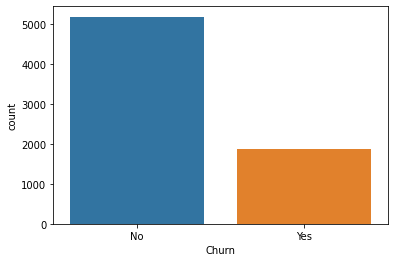

In [ ]:
sns.countplot(df['Churn'])

What percantage of customers are leaving

In [ ]:
retained=df[df.Churn=='No']
churned=df[df.Churn=='Yes']
num_retained=retained.shape[0]
num_churned=churned.shape[0]


Print the percentage of customers that stayed and left

In [ ]:
print(num_retained/(num_retained + num_churned) *100 ,"% of customers stayed with company.")
print(num_churned/(num_retained + num_churned) *100 ,"% of customers stayed with company.")


73.4630129206304 % of customers stayed with company.
26.536987079369588 % of customers stayed with company.


Visualize the churn count for both male and female

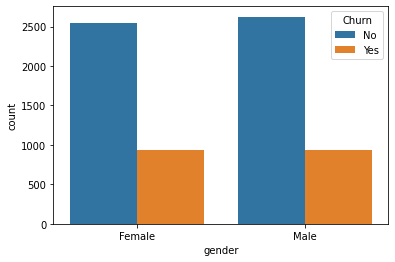

In [ ]:
sns.countplot(x='gender',hue='Churn',data=df)

Visualize the churn count for the internet service

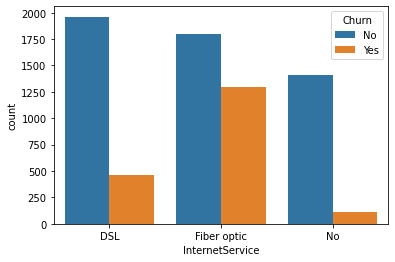

In [ ]:
sns.countplot(x='InternetService',hue='Churn',data=df)

Creating histogram

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc029719ac8>,
      dtype=object)

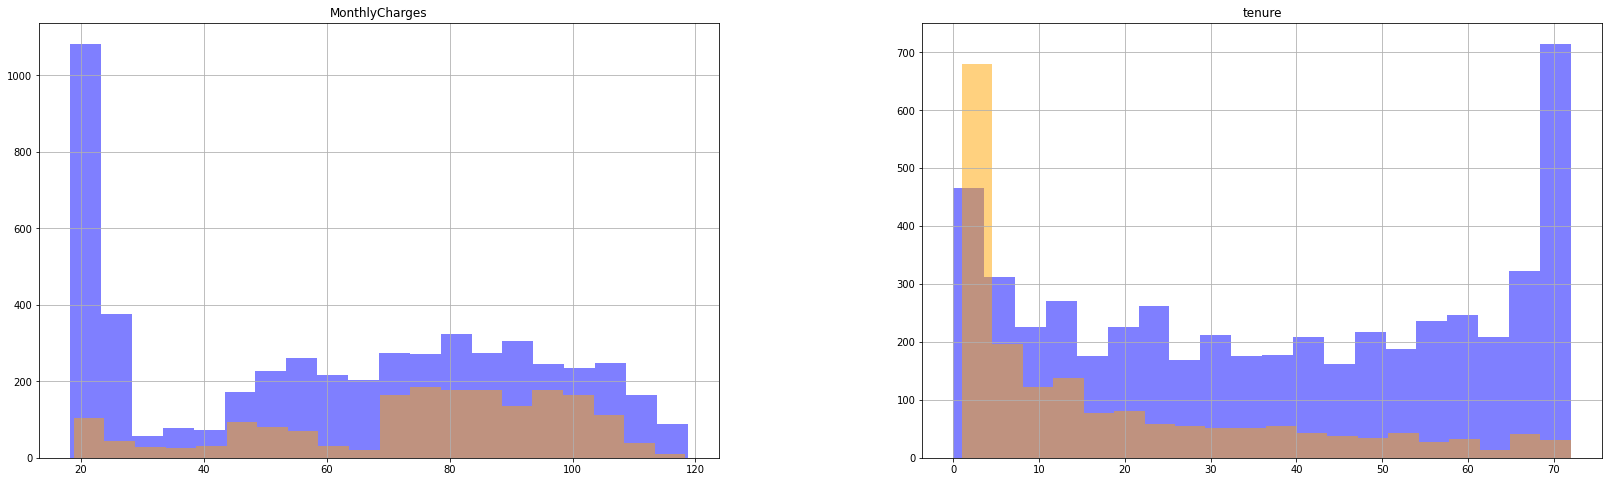

In [ ]:
numerical_features=['tenure','MonthlyCharges']
fig,ax=plt.subplots(1,2,figsize=(28,8))
df[df.Churn=='No'][numerical_features].hist(bins=20,color='blue',alpha=0.5,ax=ax)
df[df.Churn=='Yes'][numerical_features].hist(bins=20,color='orange',alpha=0.5,ax=ax)


Remove the unnecessary column customerID

In [ ]:
cleaned_df=df=df.drop('customerID',axis=1)

In [ ]:
cleaned_df.shape

(7043, 20)

Convert all non-numerical columns to numerical data types


In [ ]:
for column in cleaned_df.columns:
  if cleaned_df[column].dtype==np.number:
    continue
  cleaned_df[column]=LabelEncoder().fit_transform(cleaned_df[column])

Check the new data set data types

In [ ]:
cleaned_df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

Show the first 5 rows of the new data set

In [ ]:
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


Show cleaned data


In [ ]:
X=cleaned_df.drop('Churn',axis=1)
y=cleaned_df['Churn']

Standardizing/scaling the features

In [ ]:
X=StandardScaler().fit_transform(X)

Split the data into training and testing 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Create the model and train the model

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluate the model

In [ ]:
predictions=model.predict(x_test)
print(predictions)

[1 0 0 ... 0 0 0]


Check precission, recall, f1-score


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

